# Random Forests

Continuing with the NESARC dataset, and continuing to explore my initial hypothesis of a relationship between drinking to control social anxiety, and drinking to excess. 

In this analysis I will use a random forest classifier to attempt to find variables having a relationship with whether an individual has ever had a period where they drank more than intended (a binary, categorical outcome).

My python code is below: 

## Data Management

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

# bug fix for display formats to avoid run time errors - put after code for loading data above
pd.set_option('display.float_format', lambda x:'%f'%x)
pd.set_option('display.max_rows', None)

os.chdir("/Users/jmccallum/GIT/Coursera/Coursera")

###### Data Shaping ############
#Load the dataset

print ('reading data file...')
data = pd.read_csv('nesarc_pds.csv', low_memory=False)
data.columns = map(str.upper, data.columns)

# Current drinkers(CONSUMER  -  DRINKING STATUS ) Either 1 (yes) or 2(no) to (S7Q31A -  EVER DRANK ALCOHOL TO AVOID SOCIAL PHOBIA)
drinkerstemp=data[(data['CONSUMER'] ==1) & ((data['S7Q31A']=='1') | (data['S7Q31A']=='2'))].dropna()


#Keep only what's needed from the NESARC set
drinkers = drinkerstemp[['AGE','S1Q1D5','SEX','S7Q31A','S2AQ8B','S2AQ8C',
'S2AQ10','S2BQ1A2','S2BQ1A4','S2BQ1A7', 'S2BQ1A8','S2BQ3B', 
'S7Q1','S7Q2','S7Q3','S7Q4A1','S7Q4A2','S7Q4A3','S7Q4A4','S7Q4A5','S7Q4A6','S7Q4A7','S7Q4A8','S7Q4A9',
'S7Q4A10','S7Q4A11','S7Q4A12','S7Q4A13','S7Q4B','S7Q5','S7Q6']]


del drinkerstemp 
del data

# Convert columns  to numeric and replace 99's and nulls
for col in drinkers: 
    drinkers[col] = pd.to_numeric(drinkers[col],errors='coerce')
    drinkers[col]=drinkers[col].replace(99 ,np.nan).fillna(np.nan)

# Set missing values to Nan
for col in ['S2BQ1A2','S2BQ1A4','S2BQ1A7']: 
    drinkers[col]=drinkers[col].replace(9 ,np.nan).fillna(np.nan)

#Binary variables are all of the form (1 -yes,2 - no,9 -unkown,NA) - this fixes them
mapper = ({1:1,2:0})
for col in ['SEX','S1Q1D5','S7Q31A','S7Q1','S7Q2','S7Q3',
            'S7Q4A1','S7Q4A2','S7Q4A3','S7Q4A4','S2BQ1A2','S7Q4A5',
            'S7Q4A6','S7Q4A7','S7Q4A8','S7Q4A9','S7Q4A10',
            'S7Q4A11','S7Q4A12','S7Q4A13','S7Q4B','S7Q5','S7Q6']:
    drinkers[col] = drinkers[col].map(mapper)

del col
del mapper

drinkers = drinkers.dropna()

drinkers['UNDER30'] = drinkers['AGE'].apply(lambda x: 1 if x<30 else 0)

drinkers['S7Q31A'].value_counts()



reading data file...


(527,)

## Configure model data

Here I will select the predictor and target variables from my cleaned and managed data, and will fork my dataset into testing and training sets 

In [27]:
predictors=drinkers[['SEX','S1Q1D5','UNDER30','S2BQ1A2','S7Q31A']]

#Ever have a period where drank more than intended
targets = drinkers['S2BQ1A7']

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

(527,)

## Model fitting and diagnostics

In [22]:
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=25)
classifier = classifier.fit(pred_train,tar_train)

predictions = classifier.predict(pred_test)

In [23]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[331,  11],
       [181,   4]])

In [24]:
sklearn.metrics.accuracy_score(tar_test,predictions)

0.635673624288425

In [25]:
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
print(model.feature_importances_)

[ 0.05546196  0.2072173   0.11988485  0.35735228  0.26008361]


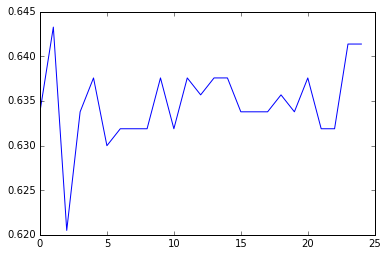

In [26]:
trees = range(25)
accuracy=np.zeros(25)

%matplotlib inline

for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx+1)
    classifier=classifier.fit(pred_train,tar_train)
    predictions=classifier.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test,predictions)
    
plt.cla()
plt.plot(trees,accuracy)